# **Tradeoff Table**
This notebook is used to examine the tradeoffs in coverage, shortage, and number of samples used to construct the CIs.

In [1]:
import numpy as np
import sys; sys.path.insert(0, '..')
from binomial_cis import max_expected_shortage
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### **Make Blank MES Tables**

In [2]:
# Column names
# alphas = np.arange(0.001, 0.5+0.001, 0.001)
# col_names = [str(np.round(alpha, 3)) for alpha in alphas]  # Replace this with your actual column names

# Create a dictionary with keys as column names and values as -1.0
# data = {col_name: [-1] * 1000 for col_name in col_names}

# Create a DataFrame from the dictionary
# df = pd.DataFrame(data)
# df.index = pd.RangeIndex(start=1, stop=1001, step=1)

# df_cp = pd.DataFrame(data)
# df_cp.index = pd.RangeIndex(start=1, stop=1001, step=1)

# Display the first few rows of the DataFrame
# df_cp.head()


### **Load in Existing MES Table**

In [3]:
df = pd.read_csv('MES_table.csv')
df_cp = pd.read_csv('MES_table_cp.csv')

# set index to be number of samples, n
df.index = pd.RangeIndex(start=1, stop=1001, step=1)
df_cp.index = pd.RangeIndex(start=1, stop=1001, step=1)

# reset column names
alphas = np.arange(0.001, 0.5+0.001, 0.001)
df.columns = [str(np.round(alpha, 3)) for alpha in alphas]
df_cp.columns = [str(np.round(alpha, 3)) for alpha in alphas]

df.head()

,0.001,0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015,0.016,0.017,0.018,0.019,0.02,0.021,0.022,0.023,0.024,0.025,0.026,0.027,0.028,0.029,0.03,0.031,0.032,0.033,0.034,0.035,0.036,0.037,0.038,0.039,0.04,0.041,0.042,0.043,0.044,0.045,0.046,0.047,0.048,0.049,0.05,0.051,0.052,0.053,0.054,0.055,0.056,0.057,0.058,0.059,0.06,0.061,0.062,0.063,0.064,0.065,0.066,0.067,0.068,0.069,0.07,0.071,0.072,0.073,0.074,0.075,0.076,0.077,0.078,0.079,0.08,0.081,0.082,0.083,0.084,0.085,0.086,0.087,0.088,0.089,0.09,0.091,0.092,0.093,0.094,0.095,0.096,0.097,0.098,0.099,0.1,0.101,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,0.11,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.12,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.13,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.14,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.15,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.16,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.17,0.171,0.172,0.173,0.174,0.175,0.176,0.177,0.178,0.179,0.18,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.19,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.2,0.201,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.21,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.22,0.221,0.222,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.23,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,0.24,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.25,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.26,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.27,0.271,0.272,0.273,0.274,0.275,0.276,0.277,0.278,0.279,0.28,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.29,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,0.3,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.31,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.32,0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.33,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.34,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.35,0.351,0.352,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.36,0.361,0.362,0.363,0.364,0.365,0.366,0.367,0.368,0.369,0.37,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.38,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.39,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.4,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.41,0.411,0.412,0.413,0.414,0.415,0.416,0.417,0.418,0.419,0.42,0.421,0.422,0.423,0.424,0.425,0.426,0.427,0.428,0.429,0.43,0.431,0.432,0.433,0.434,0.435,0.436,0.437,0.438,0.439,0.44,0.441,0.442,0.443,0.444,0.445,0.446,0.447,0.448,0.449,0.45,0.451,0.452,0.453,0.454,0.455,0.456,0.457,0.458,0.459,0.46,0.461,0.462,0.463,0.464,0.465,0.466,0.467,0.468,0.469,0.47,0.471,0.472,0.473,0.474,0.475,0.476,0.477,0.478,0.479,0.48,0.481,0.482,0.483,0.484,0.485,0.486,0.487,0.488,0.489,0.49,0.491,0.492,0.493,0.494,0.495,0.496,0.497,0.498,0.499,0.5
1,-1.000000,-1,-1,-1,-1,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1.000000,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

### **Fill Dataframe**

In [4]:
# Select which df to fill
fill_ours = True
fill_cp = True

# choose which arguments to fill df for
ns = np.arange(5, 51)
# ns = [5, 10, 20, 30, 40, 50]
alphas = [0.001, 0.01, 0.1]

# loop over arguments and compute MES
for n in ns:
    for alpha in alphas:
        alpha = np.round(alpha, 3) # only care about 3 decimals of precision here
        
        if fill_ours:
            # check if entry already exists
            if df.loc[n, str(alpha)] == -1:
                ub, lb, p_lb, num_iters = max_expected_shortage(alpha, n, tol=1e-3, verbose=False, randomized=True)
                df.loc[n, str(alpha)] = ub
            print("n: ", n, "   alpha: ", alpha, "   MES: ", df.loc[n, str(alpha)])
        
        if fill_cp:
            # check if entry already exists
            if df_cp.loc[n, str(alpha)] == -1:
                ub, lb, p_lb, num_iters = max_expected_shortage(alpha, n, tol=1e-3, verbose=False, randomized=False)
                df_cp.loc[n, str(alpha)] = ub
            print("n: ", n, "   alpha: ", alpha, "   MES_cp: ", df_cp.loc[n, str(alpha)])
        
        
    
    # save the updates after each n
    df.to_csv('MES_table.csv', index=False)
    df_cp.to_csv('MES_table_cp.csv', index=False)


n:  5    alpha:  0.001    MES:  0.6870723085322598
n:  5    alpha:  0.001    MES_cp:  0.7494095414569236
n:  5    alpha:  0.01    MES:  0.5091857319075104
n:  5    alpha:  0.01    MES_cp:  0.602792546240049
n:  5    alpha:  0.1    MES:  0.2874445588697688
n:  5    alpha:  0.1    MES_cp:  0.3731298842544131


/home/joevincent/Documents/binomial_CIs/notebooks/../binomial_cis/volume.py:44: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  exp_shortage_mm, tolerance = integrate.quad(accept_prob, eps, p1, args=(alpha, n, p2))
/home/joevincent/Documents/binomial_CIs/notebooks/../binomial_cis/volume.py:44: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  exp_shortage_mm, tolerance = integrate.quad(accept_prob, eps, p1, args=(alpha, n, p2))


n:  6    alpha:  0.001    MES:  0.6217021957175007
n:  6    alpha:  0.001    MES_cp:  0.6845568020644466
n:  6    alpha:  0.01    MES:  0.4613761971983816
n:  6    alpha:  0.01    MES_cp:  0.5369371314898407
n:  6    alpha:  0.1    MES:  0.26406617990960835
n:  6    alpha:  0.1    MES_cp:  0.33096388262068466
n:  7    alpha:  0.001    MES:  0.5691889622618859
n:  7    alpha:  0.001    MES_cp:  0.6281214369226004
n:  7    alpha:  0.01    MES:  0.4268314819805067
n:  7    alpha:  0.01    MES_cp:  0.48811302417936075
n:  7    alpha:  0.1    MES:  0.24553857863232167
n:  7    alpha:  0.1    MES_cp:  0.30084661802455126
n:  8    alpha:  0.001    MES:  0.5301617834488312
n:  8    alpha:  0.001    MES_cp:  0.5802594315003069
n:  8    alpha:  0.01    MES:  0.3998823162237122
n:  8    alpha:  0.01    MES_cp:  0.4517417450393909
n:  8    alpha:  0.1    MES:  0.23039063806612617
n:  8    alpha:  0.1    MES_cp:  0.27891959904362423
n:  9    alpha:  0.001    MES:  0.49937021353054956
n:  9    alpha

### **Print Filled Part of Dataframe**

#### Filled df

In [5]:
df.loc[ns, [str(alpha) for alpha in alphas]]

,0.001,0.01,0.1
5,0.687072,0.509186,0.287445
6,0.621702,0.461376,0.264066
7,0.569189,0.426831,0.245539
8,0.530162,0.399882,0.230391
9,0.499370,0.377818,0.217818
10,0.474046,0.359233,0.207141
11,0.452533,0.343265,0.197864
12,0.433925,0.329266,0.189737
13,0.417556,0.316869,0.182563
14,0.402981,0.305778,0.176126


#### Filled df_cp

In [6]:
df_cp.loc[ns, [str(alpha) for alpha in alphas]]

,0.001,0.01,0.1
5,0.749410,0.602793,0.373130
6,0.684557,0.536937,0.330964
7,0.628121,0.488113,0.300847
8,0.580259,0.451742,0.278920
9,0.542769,0.423072,0.261873
10,0.512492,0.399555,0.246831
11,0.487222,0.379727,0.233591
12,0.465636,0.362663,0.223100
13,0.446830,0.347745,0.213540
14,0.430226,0.334549,0.204739


### **Plot**

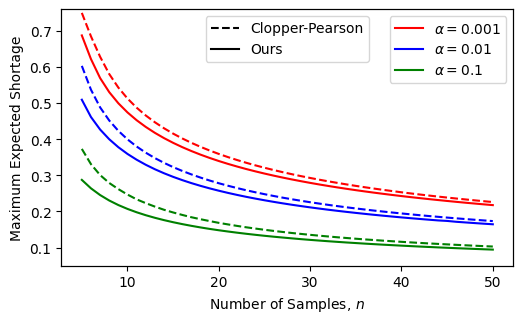

In [8]:
import matplotlib.pyplot as plt

ns = np.arange(5, 51)
# ns = [5, 10, 20, 30, 40, 50]
alphas = [0.001, 0.01, 0.1]
colors = ['red', 'blue', 'green']

fig, ax = plt.subplots(figsize=(7*(2.5/3),4*(2.5/3)))

for i,alpha in enumerate(alphas):
    ax.plot(ns, df.loc[ns, str(alpha)], label=str(r"$\alpha = $" + str(alpha)), color=colors[i])
    ax.plot(ns, df_cp.loc[ns, str(alpha)], linestyle='dashed', color=colors[i])
ax.axhline(y = 0, color = 'grey', linestyle = 'dotted', alpha=0.8)
ax.set_ylim(0.05,0.76)
ax.set_xlabel(r"Number of Samples, $n$")
ax.set_ylabel("Maximum Expected Shortage")

ax2 = ax.twinx()
ax2.plot(np.NaN, np.NaN, linestyle='--', label='Clopper-Pearson', c='black')

ax2.plot(np.NaN, np.NaN, linestyle='-', label='Ours', c='black')
ax2.get_yaxis().set_visible(False)


ax.legend(loc='upper right')
ax2.legend(loc='upper center')

plt.savefig("mes_tradeoff_cp.svg")